# ML Project 8

+ **SPX:** Amerika Birleşik Devletleri'ndeki en büyük 500 halka açık şirketi temsil eden bir borsa endeksidir.
+ **USO:** Amerikan Ordusu üyeleri ile ailelerine eğlence ve bakım hizmetleri sunan bir kuruluştur.
+ **SLV:** Gümüş fiyatları
+ **GLD:** Altın fiyatları
+ **EUR/USD:** EUR/USD fiyatları

## Importing Libraries and Data

In [1]:
import os 
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
#Model kütüphanelerini, modeli kurarken
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
project_8 = pd.read_csv("gld_price_data.csv")

In [4]:
project_8

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


## Data Analysing

In [5]:
project_8.head(3)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


### .info()

In [6]:
project_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### .shape 

In [7]:
project_8.shape

(2290, 6)

### .columns

In [8]:
project_8.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

### .describe()

In [9]:
project_8.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### .count()

In [10]:
project_8.count()

Date       2290
SPX        2290
GLD        2290
USO        2290
SLV        2290
EUR/USD    2290
dtype: int64

### .isnull().sum()

In [11]:
project_8.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### .duplicated() and drop_duplicates()

In [12]:
project_8.duplicated().sum()

np.int64(0)

### .corr() and heatmap

<Axes: >

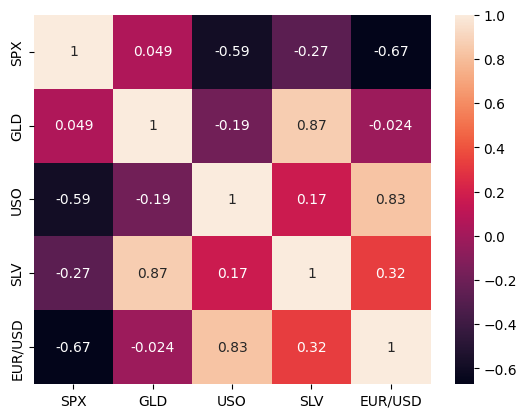

In [13]:
cor = project_8.drop(columns = "Date", axis = 1).corr()
sns.heatmap(cor, annot = True)

+ 0.8'den büyük veya -0.8'ten küçük bir korelasyona rastlamadık. Bu değerlere yakın birkaç değer bulsak da, bütün sütunların birbirinden bağımsız olduğunu söyleyebiliriz

### Changing dtype of `Date` column to `datetime` and make new columns

In [14]:
project_8["Date"] = pd.to_datetime(project_8["Date"])

In [15]:
project_8["Years"] = project_8["Date"].dt.year

In [16]:
project_8["Months"] = project_8["Date"].dt.month

In [17]:
project_8["Days"] = project_8["Date"].dt.day

In [18]:
project_8.head(2)

,Date,SPX,GLD,USO,SLV,EUR/USD,Years,Months,Days
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2008,1,2
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,2008,1,3


### .value_counts()

In [19]:
project_8["Date"].dt.year.value_counts()

Date
2009    224
2014    224
2015    223
2011    222
2010    222
2016    221
2013    221
2012    219
2017    218
2008    209
2018     87
Name: count, dtype: int64

In [20]:
project_8["Months"].value_counts()

Months
3     236
1     222
2     212
12    212
11    201
4     188
10    177
5     174
6     172
7     169
8     165
9     162
Name: count, dtype: int64

In [21]:
project_8["Days"].value_counts()

Days
9     81
8     79
14    79
23    79
11    78
2     78
7     77
3     77
10    77
22    77
28    77
12    77
13    77
6     76
16    76
27    75
15    75
18    74
17    74
20    74
24    74
5     74
19    74
21    73
26    72
4     71
29    70
1     69
25    68
30    67
31    41
Name: count, dtype: int64

### .groupby()

In [22]:
#Altın fiyatının yıllara göre ortalaması
project_8.groupby("Years")["GLD"].mean()

Years
2008     86.111148
2009     95.834464
2010    119.966397
2011    152.591486
2012    162.151507
2013    136.853213
2014    121.721294
2015    111.165561
2016    118.780634
2017    119.546101
2018    126.017056
Name: GLD, dtype: float64

In [23]:
#Altın fiyatının aylara göre ortalaması
project_8.groupby("Months")["GLD"].mean()

Months
1     120.580811
2     123.159434
3     123.064110
4     122.074840
5     122.264102
6     121.253139
7     120.656213
8     127.388727
9     124.611296
10    123.501639
11    124.273184
12    120.854151
Name: GLD, dtype: float64

In [24]:
#EUR/USD fiyatlarının yıllara göre ortalaması
project_8.groupby("Years")["EUR/USD"].mean()

Years
2008    1.464481
2009    1.393900
2010    1.330050
2011    1.389480
2012    1.287449
2013    1.329559
2014    1.327894
2015    1.109867
2016    1.105778
2017    1.127742
2018    1.224856
Name: EUR/USD, dtype: float64

## Visualization (EDA)

### Dağılım Grafikleri

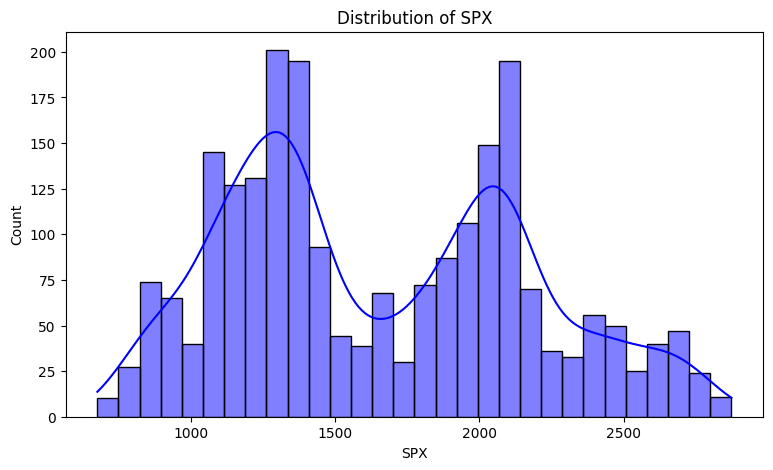

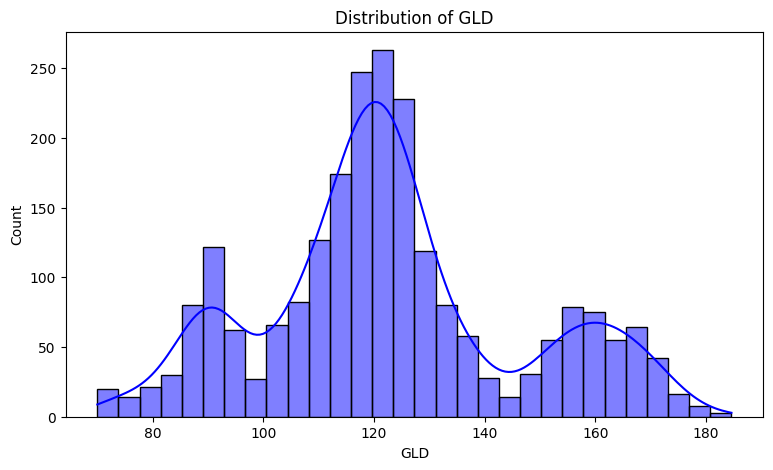

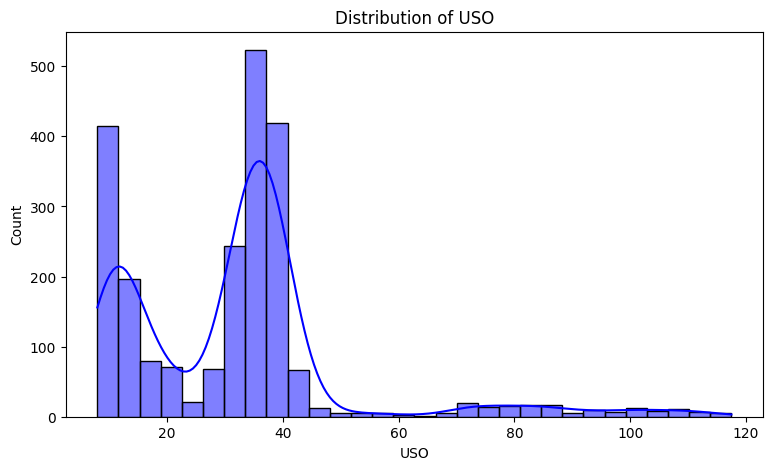

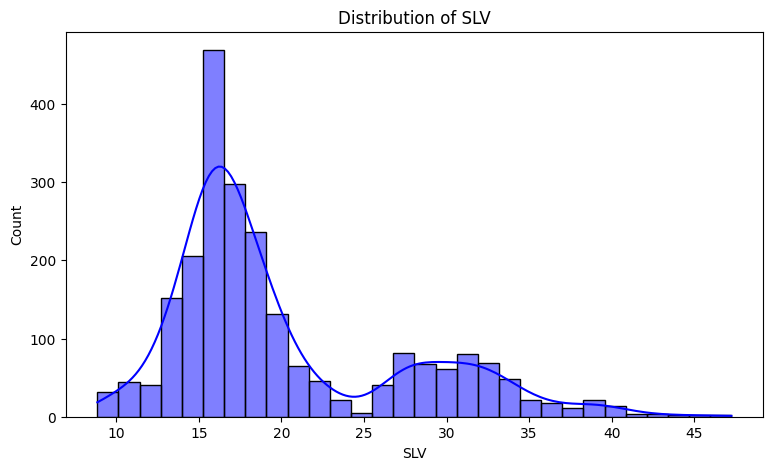

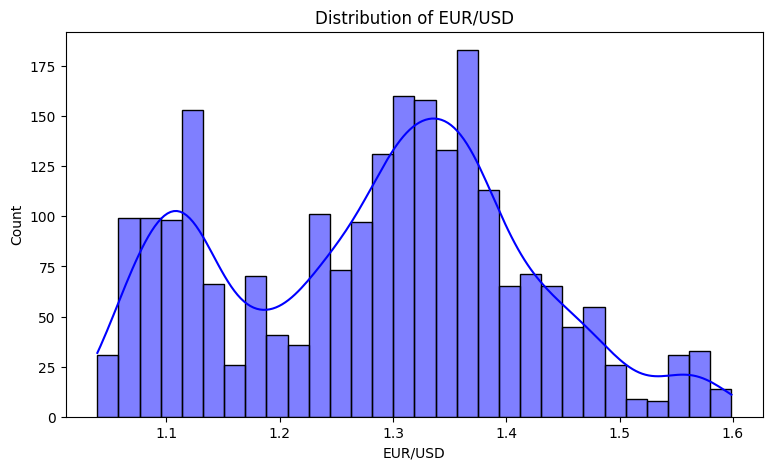

In [25]:
for column in project_8.drop(columns = ["Date", "Months", "Years", "Days"], axis = 1):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_8, x=column, kde=True, bins=30, color = "blue")
    plt.title(f'Distribution of {column}')
    plt.show()

### Tarihe Göre Fiyatlar

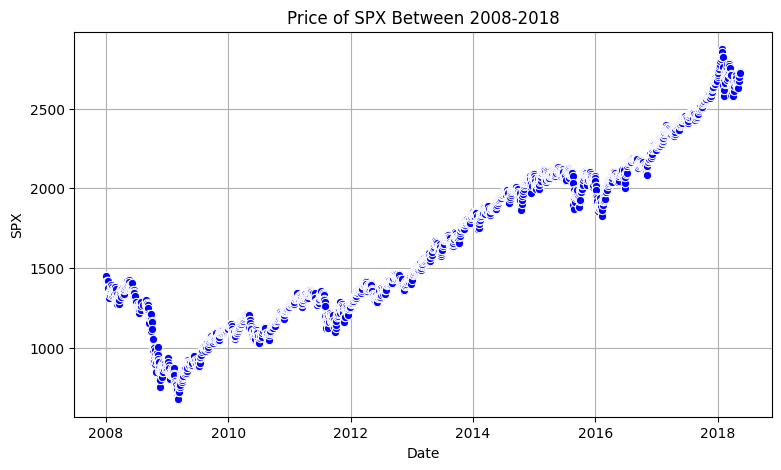

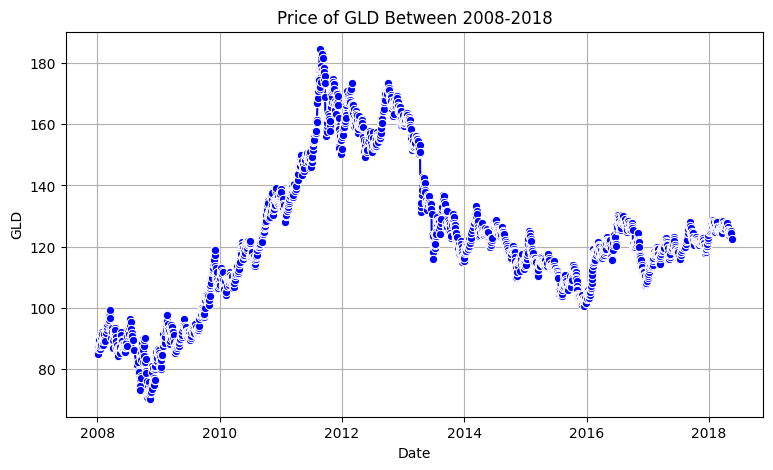

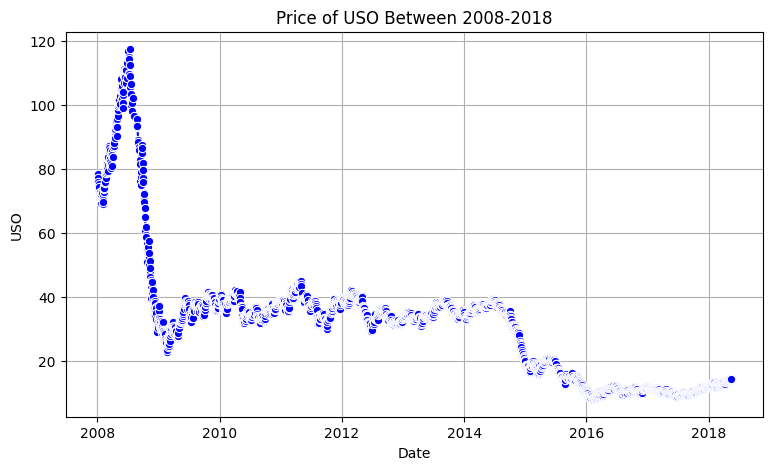

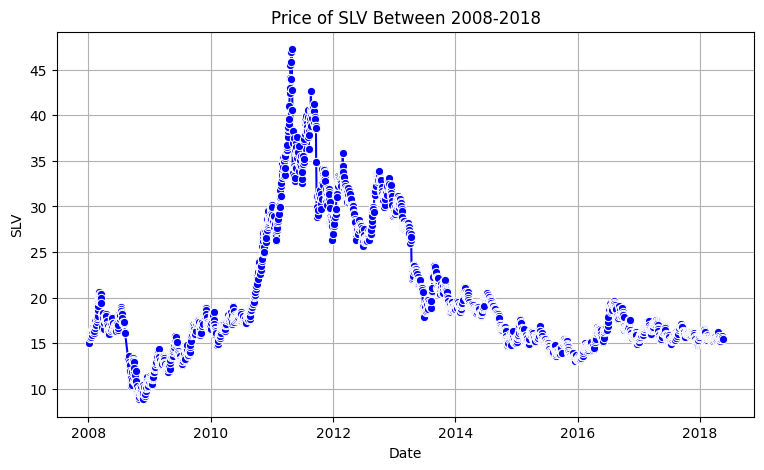

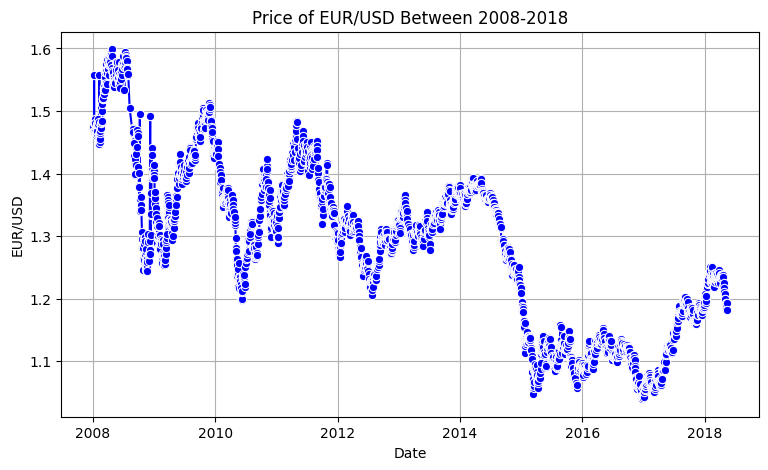

In [26]:
for column in project_8.drop(columns = ["Date", "Months", "Years", "Days"], axis = 1):
    plt.figure(figsize=(9, 5))
    sns.lineplot(data=project_8, x="Date", y=column, color = "blue", marker = "o")
    plt.title(f'Price of {column} Between 2008-2018')
    plt.grid(True)
    plt.show()

### Yıllara Göre Ortalama Fiyatlar

C:\Users\ogulc\AppData\Local\Temp\ipykernel_17224\2285182809.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(gld_mean_by_years, palette='viridis')


<Axes: xlabel='Years', ylabel='GLD'>

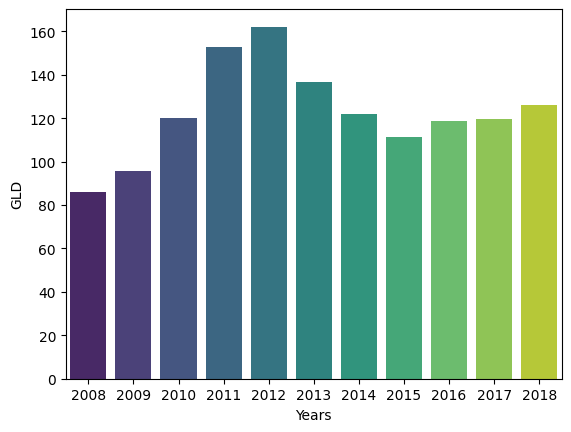

In [27]:
#Altın fiyatlarının yıllara göre ortalamaları
gld_mean_by_years = project_8.groupby("Years")["GLD"].mean()
sns.barplot(gld_mean_by_years, palette='viridis')

C:\Users\ogulc\AppData\Local\Temp\ipykernel_17224\1274455274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(slv_mean_by_years, palette='viridis')


<Axes: xlabel='Years', ylabel='SLV'>

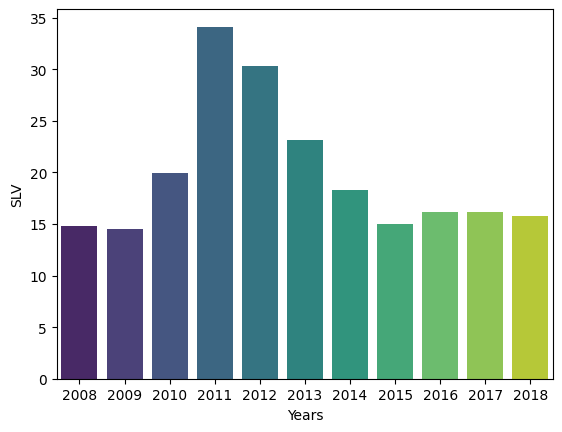

In [28]:
#Gümüş fiyatlarının yıllara göre ortalamaları
slv_mean_by_years = project_8.groupby("Years")["SLV"].mean()
sns.barplot(slv_mean_by_years, palette='viridis')

C:\Users\ogulc\AppData\Local\Temp\ipykernel_17224\3634025052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(eusd_mean_by_years, palette='viridis')


<Axes: xlabel='Years', ylabel='EUR/USD'>

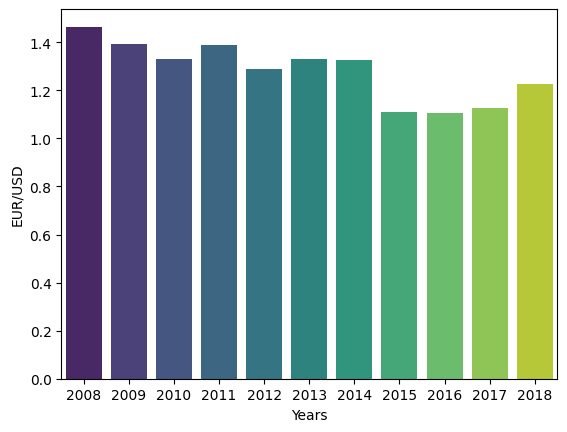

In [29]:
#EUR/USD fiyatlarının yıllara göre ortalamaları
eusd_mean_by_years = project_8.groupby("Years")["EUR/USD"].mean()
sns.barplot(eusd_mean_by_years, palette='viridis')

C:\Users\ogulc\AppData\Local\Temp\ipykernel_17224\646215886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(uso_mean_by_years, palette='viridis')


<Axes: xlabel='Years', ylabel='USO'>

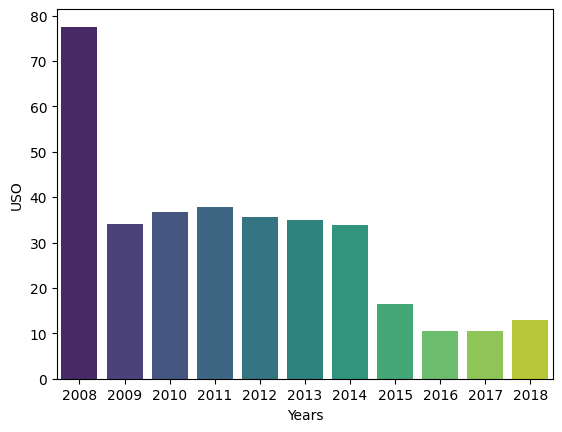

In [30]:
#USO fiyatlarının yıllara göre ortalamarı 
uso_mean_by_years = project_8.groupby("Years")["USO"].mean()
sns.barplot(uso_mean_by_years, palette='viridis')

C:\Users\ogulc\AppData\Local\Temp\ipykernel_17224\1558658385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(spx_mean_by_years, palette='viridis')


<Axes: xlabel='Years', ylabel='SPX'>

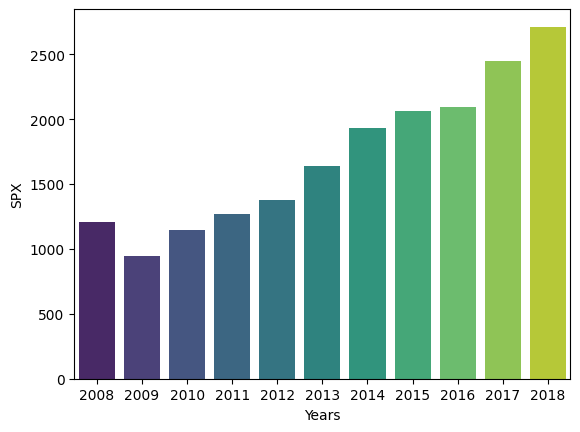

In [31]:
#SPX fiyatlarının yıllara göre ortalamaları
spx_mean_by_years = project_8.groupby("Years")["SPX"].mean()
sns.barplot(spx_mean_by_years, palette='viridis')

## Seperating Data

In [33]:
X = project_8.drop(columns = ["Date", "Years", "Months", "Days"], axis = 1)
y = project_8["GLD"]

In [34]:
X.head(3)

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492


In [36]:
y.head(3)

0    84.860001
1    85.570000
2    85.129997
Name: GLD, dtype: float64

## Splitting Data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 5) (2061, 5) (229, 5)


In [39]:
print(y.shape, y_train.shape, y_test.shape)

(2290,) (2061,) (229,)


## Model Training, Evaluating and Compare with DummyClassifier

In [40]:
from sklearn.dummy import DummyRegressor
dummy_regressor = DummyRegressor(strategy = "mean").fit(X_train, y_train)

In [42]:
print("Dummy Regressor'un Test Setindeki Doğruluğu:", dummy_regressor.score(X_test, y_test))

Dummy Regressor'un Test Setindeki Doğruluğu: -0.02012463938978537


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR

In [44]:
regression_models = {"Decision Tree": DecisionTreeRegressor(),
                   "Random Forest": RandomForestRegressor(),
                   "Gradient Boosting": GradientBoostingRegressor(),
                   "Ada Boost": AdaBoostRegressor(),
                   "KNN": KNeighborsRegressor(),
                   "Linear Regression": LinearRegression(),
                   "Lasso Regression": Lasso(),
                   "Ridge Regression": Ridge(),
                   "Linear SVR": SVR(kernel = "linear"),
                   "RBF SVR": SVR(kernel = "rbf"),
                   "Polynomial SVR": SVR(kernel = "poly")}

In [46]:
model_names = []
train_score = []
test_score = []
mse_score = []
r2score = []

for name, reg in regression_models.items():
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    score_train = reg.score(X_train, y_train)
    score_test = reg.score(X_test, y_test)
    score_mse = mean_squared_error(y_test, predictions)
    score_r2 = r2_score(y_test, predictions)
    
    model_names.append(name)
    train_score.append(score_train)
    test_score.append(score_test)
    mse_score.append(score_mse)
    r2score.append(score_r2)
    
    print(f"{name} Train setindeki doğruluk: {score_train}")
    print(f"{name} Test setindeki doğruluk: {score_test}")
    print(f"{name} MSE Skoru: {score_mse}")
    print(f"{name} R^2 Skoru: {score_r2}\n")

Decision Tree Train setindeki doğruluk: 1.0
Decision Tree Test setindeki doğruluk: 0.9999675263001047
Decision Tree MSE Skoru: 0.014436277399541255
Decision Tree R^2 Skoru: 0.9999675263001047

Random Forest Train setindeki doğruluk: 0.9999963005835217
Random Forest Test setindeki doğruluk: 0.9999897926225195
Random Forest MSE Skoru: 0.00453771924062035
Random Forest R^2 Skoru: 0.9999897926225195

Gradient Boosting Train setindeki doğruluk: 0.9999326562249394
Gradient Boosting Test setindeki doğruluk: 0.9998867640005632
Gradient Boosting MSE Skoru: 0.05033939171544893
Gradient Boosting R^2 Skoru: 0.9998867640005632

Ada Boost Train setindeki doğruluk: 0.9952767766387991
Ada Boost Test setindeki doğruluk: 0.9943141042363542
Ada Boost MSE Skoru: 2.527681439851987
Ada Boost R^2 Skoru: 0.9943141042363542

KNN Train setindeki doğruluk: 0.9946602936216811
KNN Test setindeki doğruluk: 0.9895969742589547
KNN MSE Skoru: 4.624695241877314
KNN R^2 Skoru: 0.9895969742589547

Linear Regression Train

## Graphs of Model's Predicts 

In [47]:
y_test_list = list(y_test)

In [ ]:
plt.plot(y_test_list, color = "red", label = "Actual Value")